<a href="https://colab.research.google.com/github/camellikna/Camellia/blob/main/Salary_Estimated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## **This Project is for predicting the salary of data related jobs**




In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving df.csv to df.csv


## Import All Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

## Read Raw Data

In [9]:
df_raw = pd.read_csv('df.csv')

## Data Understanding

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [11]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [12]:
df_raw.describe()

,Rating
count,5892.000000
mean,3.244603
std,1.660970
min,-1.000000
25%,3.300000
50%,3.800000
75%,4.100000
max,5.000000


A few quick things come to mind looking at the above data:

1. The salary estimate is not good enough for making decisions because it's strong and should change to int
2. For location, we can separate states.
3. For rating, we have some minus points, and it should be cleaned
4. In the salary estimate we have some value that should be clear, like per hour or "-1"

#  "Job Title", "Salary Estimated", "Rating" and "Location" columns chosen for analyzing.


#Clean Data

*  Created minimum and maximum salary columns for the positions and parsed the
corresponding values out of the raw data

*   Created average salary column


* Extracted the state where each position is located. Created a state column

* Title column was created to show the different categories for the posted roles such as data engineer, deep learning, analyst, ...

In [29]:
# Remove "-1" from Salary Estimate
df = df_raw[df_raw['Salary Estimate']!='-1']

In [31]:
# Remove "Per Hour" from Salary Estimate
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [ ]:
# Remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))

In [ ]:
# Remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))

In [ ]:
#Splite
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.split())

In [ ]:
# Min and Max Parameter
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [ ]:
# Calculate AVG salary from Min and Max
df['Max_salary']=df['Max_salary'].astype(int)
df['Min_salary']=df['Min_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [ ]:
# State
df['State']=df['Location'].apply(lambda x: x.split()[-1])
# remove United Kingdom
df = df[df.State != 'Kingdom']

In [44]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [ ]:
# Change Job Title Category
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [53]:
# Clean the Rating attribute
df = df[df['Rating']!=-1]

In [54]:
# Make new Data Frame
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [55]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


# Data Visualization

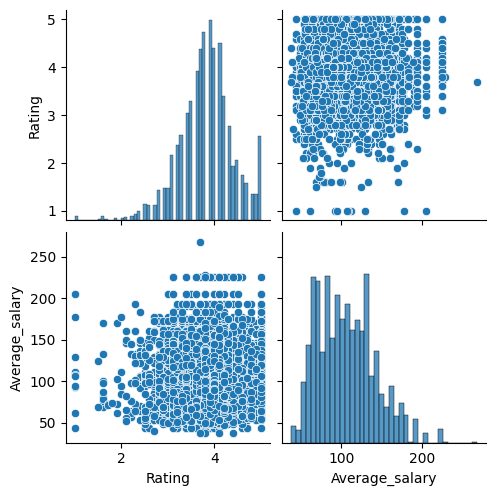

In [56]:
sns.pairplot(cleaned_df)

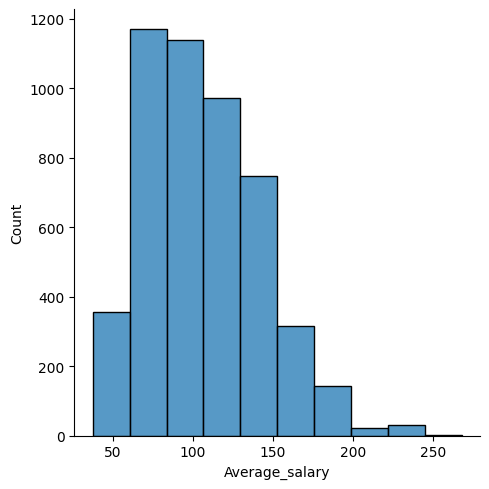

In [57]:
sns.displot(x='Average_salary', data= cleaned_df, bins = 10)

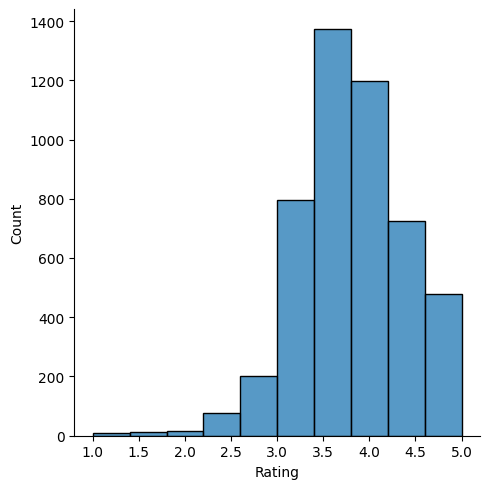

In [58]:
sns.displot(x='Rating' , data = cleaned_df , bins = 10)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'other'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'manager'),
  Text(6, 0, 'machine learning engineer'),
  Text(7, 0, 'director'),
  Text(8, 0, 'deep learning engineer')])

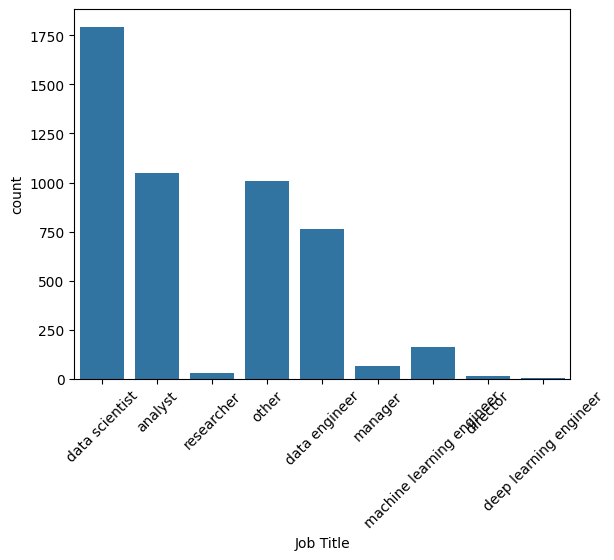

In [59]:
sns.countplot(x='Job Title', data= cleaned_df)
plt.xticks(rotation= 45)

<Axes: xlabel='Rating', ylabel='Average_salary'>

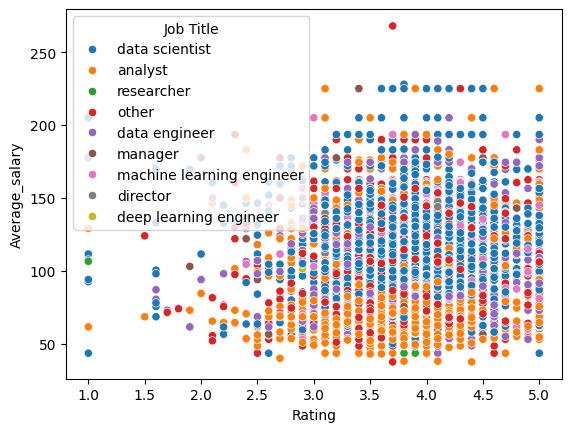

In [60]:
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

# Feature Engineering

In [61]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 320.1+ KB


In [63]:
preprocessed_df = pd.get_dummies(cleaned_df,columns =['Job Title' , 'State'] )

In [65]:
x = preprocessed_df.drop(columns = 'Average_salary')

In [66]:
y = preprocessed_df['Average_salary']

# Modeling


In [68]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.4 , random_state = 101)

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
# print the intercept(b0)
print(lr.intercept_)

3058646663289845.5


In [72]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[ 2.24685151e+00 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15
 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15 -2.49466685e+15
 -2.49466685e+15 -2.49466685e+15 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14 -5.63979815e+14
 -5.63979815e+14]


In [73]:
# Prediction
predictions = lr.predict(x_test)
predictions

array([ 94. , 123.5,  92.5, ...,  83. ,  92. ,  92.5])

<Axes: xlabel='Average_salary'>

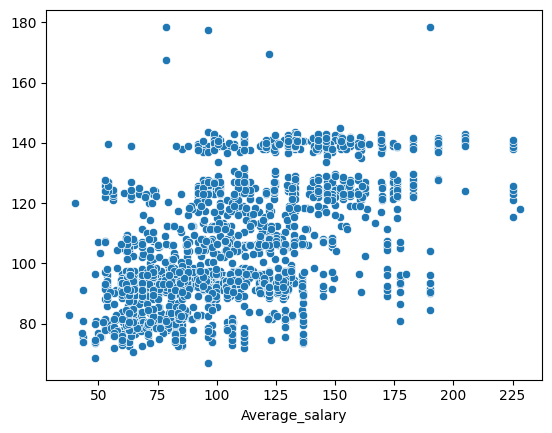

In [74]:
sns.scatterplot(x=y_test, y=predictions)

In [75]:
residual= y_test-predictions

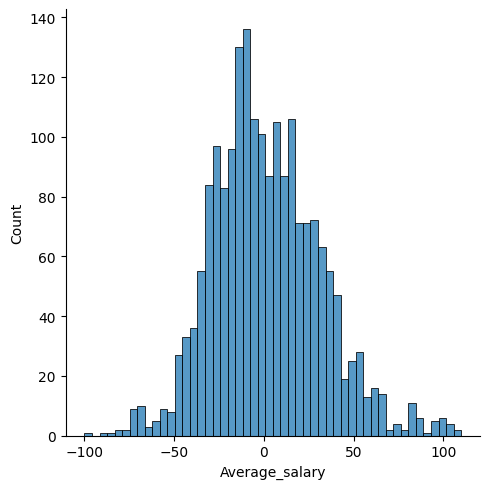

In [76]:
sns.displot(residual,bins=50)

In [79]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 23.80148185998978



# Save the Model

In [80]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb'))